In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk  #Natural Language model
from nltk.tokenize import word_tokenize

# Download the 'punkt' package if you haven't already
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Download the 'vader_lexicon' if you haven't already
nltk.download('vader_lexicon')

plt.style.use('ggplot')




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshitakhajuria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/akshitakhajuria/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akshitakhajuria/nltk_data...


In [3]:
#Importing reviews data 

df = pd.read_csv("/Users/akshitakhajuria/Downloads/Reviews.csv")
df

#reducing the size of the dataset for simplification of the initial model 

df = df.head(1000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


## Conducting Sentimental Analysis on 1000 Amazon reviews

In [5]:
# Understanding the important variables in the dataset 

df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df['Score'].value_counts().sort_index()

Score
1     98
2     47
3     75
4    138
5    642
Name: count, dtype: int64

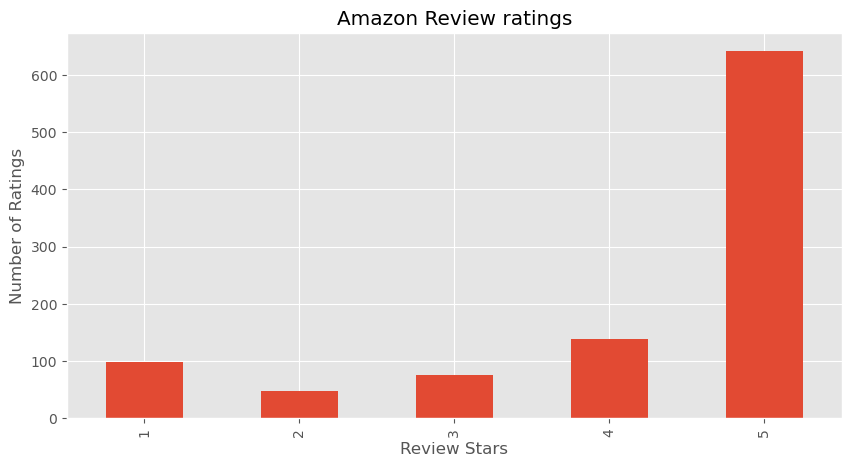

In [15]:
#Creating a plot to see the distribution of reviews 

scores = df['Score'].value_counts().sort_index().plot(kind = 'bar', 
                                                      title = "Amazon Review ratings", 
                                                      figsize = (10,5))

scores.set_xlabel("Review Stars")
scores.set_ylabel("Number of Ratings")

plt.show()


In [27]:
#Basic understanding of the reviews

text1 = df["Text"][20]
text1

"My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner."

In [28]:
#Tokenize the review 

tokens = nltk.word_tokenize(text1)
tokens[:10]

['My', 'husband', 'is', 'a', 'Twizzlers', 'addict', '.', 'We', "'ve", 'bought']

In [33]:
#Finding the parts of Speech for each of the word or tokens 

tags = nltk.pos_tag(tokens)
tags[:10]



[('My', 'PRP$'),
 ('husband', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('Twizzlers', 'NNP'),
 ('addict', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ("'ve", 'VBP'),
 ('bought', 'VBN')]

## VADER Seniment Scoring

Vader uses a dictionary of words and rules to determine the sentiment of a piece of text. It uses a valence score for each word to determine its positivity or negativity. The valence score ranges from -4 to +4, with -4 being the most negative and +4 being the most positive

### We will be using Compounded score provided by VADER for each sentence to find if the sentence is positive, negative, or neutral

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [40]:
feelings = SentimentIntensityAnalyzer()

In [49]:
feelings.polarity_scores('I am not sure if I am happy')

{'neg': 0.203, 'neu': 0.414, 'pos': 0.383, 'compound': 0.4094}

In [57]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = feelings.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [58]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [59]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Plotting VADER Results to visualize the sentiments of public for Amazon product

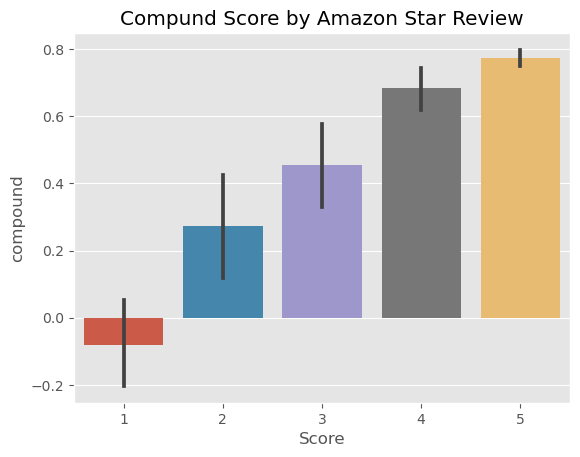

In [60]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

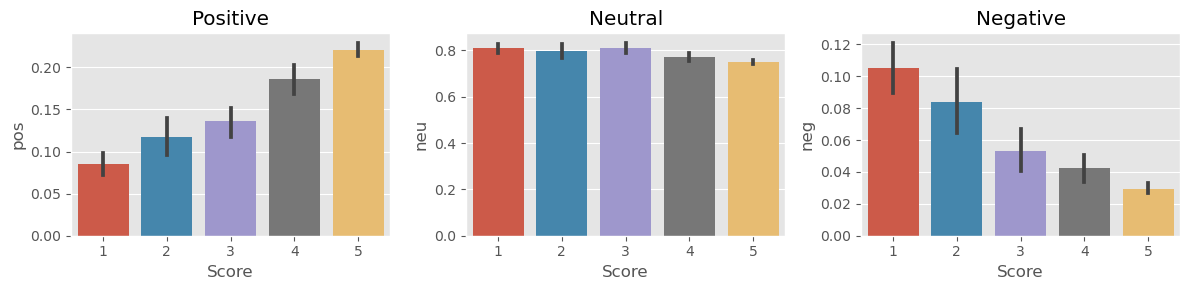

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

##  Final Conclusion

From the sentiment analysis of Amazon reviews, it can be understood that:

Reviews are generally more positive as the rating score increases. The positive sentiment increases progressively from score 1 to score 5, with the highest positive sentiment associated with 5-star reviews.

Negative sentiment is more prevalent in lower-rated reviews. The highest negative sentiment is associated with 1-star reviews, and it decreases as the rating score increases, with 5-star reviews showing the least negative sentiment.

Neutral sentiment is fairly consistent across all scores but shows a slight decrease as the rating score increases. This means that neutral content is present in reviews regardless of the rating but is slightly more common in lower-rated reviews.


Overall, the data suggests that higher-rated reviews (4 and 5 stars) tend to be more positive, while lower-rated reviews (1 and 2 stars) tend to be more negative. Neutral sentiments are present throughout but are more consistent and slightly higher in lower ratings.